# Word2Vec

In [26]:
# import modules & set up logging
import gensim, logging, numpy as np
import help_functions as hf
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

#@author: The first version of this code is the courtesy of Vadim Selyanik


logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
lemmatizer = nltk.WordNetLemmatizer() # create a lemmatizer

sentences = []
file = open("lemmatized.text", "r")

for line in file: # read the file and create list which contains all sentences found in the text
    sentences.append(line.split())
# train word2vec on the two sentences

dimension = 1000 # parameter for Word2vec size of vectors for word embedding

threshold = 0.00055 # parameter for Word2vec


sum = 0.0

# 
model = gensim.models.Word2Vec(sentences, min_count=1, sample=threshold, sg=1,vector_size=dimension) # create model using Word2Ve with the given parameters
#
print(len(model.wv.key_to_index)) # check the length of the vocabulary which was formed by Word2Vec

#The rest implements passing TOEFL tests
i = 0 #counter for TOEFL tests
number_of_tests = 80
text_file = open('new_toefl.txt', 'r')
right_answers = 0 # variable for correct answers
number_skipped_tests = 0 # some tests could be skipped if there are no corresponding words in the vocabulary extracted from the training corpus
while i < number_of_tests:
            line = text_file.readline() #read line in the file
            words = line.split() # extract words from the line
            try:
                words = [lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, 'v'), 'n'), 'a') for word in
                         words] # lemmatize words in the current test
                vectors = []
                if words[0] in model.wv:  # check if there is an embedding for the query word
                    k = 1 #counter for loop iterating over 5 words in the test
                    vectors.append(model.wv[words[0]])  # access the vector for the word
                    while k < 5:
                        if words[k] in model.wv:  # check if the alternative word has an embedding
                            vectors.append(model.wv[words[k]])  # assign the learned vector
                        else: 
                            vectors.append(np.random.randn(dimension)) #assing random vector
                        k += 1
                    right_answers += hf.get_answer_mod(vectors) #find the closest vector and check if it is the correct answer

            except KeyError: # if there is no representation for the query vector than skip
                number_skipped_tests += 1
                print("skipped test: " + str(i) + "; Line: " + str(words))
            except IndexError:
                print(i)
                print(line)
                print(words)
                break
            i += 1
text_file.close()
sum += 100 * float(right_answers) / float(number_of_tests) #get the percentage
print("Threshold ferq = "+ str(threshold)+" Percentage of correct answers: " + str(sum) + "%")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\helig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\helig\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\helig\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
2024-11-08 13:54:32,837 : INFO : collecting all words and their counts
2024-11-08 13:54:32,847 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-11-08 13:54:32,858 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2024-11-08 13:54:32,888 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2024-11-08 13:54:32,911 : INFO : PROGRESS: at sentence #30000, processed 367772 wo

70583
Threshold ferq = 0.00055 Percentage of correct answers: 68.75%


## Dimension of 10
1. Threshold ferq = 0.00055 Percentage of correct answers: 50.0%
2. Threshold ferq = 0.00055 Percentage of correct answers: 48.75%
3. Threshold ferq = 0.00055 Percentage of correct answers: 50.0%
4. Threshold ferq = 0.00055 Percentage of correct answers: 51.25%
5. Threshold ferq = 0.00055 Percentage of correct answers: 51.25%

## Dimension of 50
1. Threshold ferq = 0.00055 Percentage of correct answers: 72.5%
2. Threshold ferq = 0.00055 Percentage of correct answers: 67.5%
3. Threshold ferq = 0.00055 Percentage of correct answers: 66.25%
4. Threshold ferq = 0.00055 Percentage of correct answers: 67.5%
5. Threshold ferq = 0.00055 Percentage of correct answers: 67.5%

## Dimension of 100
1. Threshold ferq = 0.00055 Percentage of correct answers: 68.75%
2. Threshold ferq = 0.00055 Percentage of correct answers: 68.75%
3. Threshold ferq = 0.00055 Percentage of correct answers: 71.25%
4. Threshold ferq = 0.00055 Percentage of correct answers: 67.5%
5. Threshold ferq = 0.00055 Percentage of correct answers: 70.0%

## Dimension of 300
1. Threshold ferq = 0.00055 Percentage of correct answers: 70.0%
2. Threshold ferq = 0.00055 Percentage of correct answers: 70.0%
3. Threshold ferq = 0.00055 Percentage of correct answers: 72.5%
4. Threshold ferq = 0.00055 Percentage of correct answers: 72.5%
5. Threshold ferq = 0.00055 Percentage of correct answers: 70.0%

## Dimension of 1000
1. Threshold ferq = 0.00055 Percentage of correct answers: 68.75%

While only three different dimensions were needed, I tested 5 to draw better conclusions about the accuracy and performance of each test. The largest jump in accuracy can be seen somehwere between 10 and 50, which suggests increasing dimensionality from very low values allows the model to capture more relevant features. With this in mind, from 50 and upward, the increased accuracy is noticably smaller, and leads to a higher increase in computation time. Finally, the model seem to reach a plateu around 300 dimensions, with close to no improvement at all.

To conclude this section we can plot our results to visualize the results further:


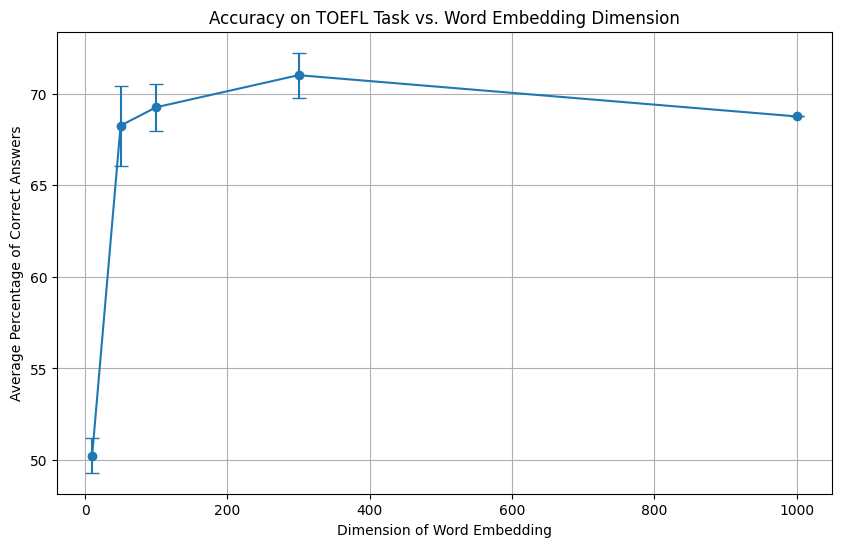

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dimensions = [10, 50, 100, 300, 1000]
results = {
    10: [50.0, 48.75, 50.0, 51.25, 51.25],
    50: [72.5, 67.5, 66.25, 67.5, 67.5],
    100: [68.75, 68.75, 71.25, 67.5, 70.0],
    300: [70.0, 70.0, 72.5, 72.5, 70.0],
    1000: [68.75]
}

averages = [np.mean(results[dim]) for dim in dimensions]
std_devs = [np.std(results[dim]) for dim in dimensions]

plt.figure(figsize=(10, 6))
plt.errorbar(dimensions, averages, yerr=std_devs, fmt='-o', capsize=5)
plt.xlabel('Dimension of Word Embedding')
plt.ylabel('Average Percentage of Correct Answers')
plt.title('Accuracy on TOEFL Task vs. Word Embedding Dimension')
plt.grid(True)
plt.show()
plt.close()

# Random indexing with permutations (RI)

In [28]:
import numpy as np
import text_functions as tf
import nltk

#@author: The first version of this code is the courtesy of Vadim Selyanik

threshold = 15000 # Frequency threshold in the corpus ??
dimension = 1000 # Dimensionality for high-dimensional vectors
lemmatizer = nltk.WordNetLemmatizer()  # create an instance of lemmatizer
ones_number = 2 # number of nonzero elements in randomly generated high-dimensional vectors
window_size = 2 #number of neighboring words to consider both back and forth. In other words number of words before/after current word
zero_vector = np.zeros(dimension)
test_name = "new_toefl.txt" # file with TOEFL dataset
data_file_name = "lemmatized.text" # file with the text corpus

amount_dictionary = {}

# Count how many times each word appears in the corpus
text_file = open(data_file_name, "r")
for line in text_file:
    if line != "\n":
        words = line.split()
        for word in words:
            if amount_dictionary.get(word) is None:
                amount_dictionary[word] = 1
            else:
                amount_dictionary[word] += 1
text_file.close()

dictionary = {} #vocabulary and corresponing random high-dimensional vectors
word_space = {} #embedings

#Create a dictionary with the assigned random high-dimensional vectors
text_file = open(data_file_name, "r")
for line in text_file: #read line in the file
    words = line.split() # extract words from the line
    for word in words:  # for each word
        if dictionary.get(word) is None: # If the word was not yed added to the vocabulary
            if amount_dictionary[word] < threshold:
                dictionary[word] = tf.get_random_word_vector(dimension, ones_number) # assign a  
            else:
                dictionary[word] = np.zeros(dimension) # frequent words are assigned with empty vectors. In a way they will not contribute to the word embedding

text_file.close()

#Note that in order to save time we only create embeddings for the words needed in the TOEFL task

    #Find all unique words amongst TOEFL tasks and initialize their embeddings to zeros    
number_of_tests = 0
text_file = open(test_name, "r") #open TOEFL tasks
for line in text_file:
        words = line.split()
        words = [lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, 'v'), 'n'), 'a') for word in
                 words] # lemmatize words in the current test
        word_space[words[0]] = np.zeros(dimension)
        word_space[words[1]] = np.zeros(dimension)
        word_space[words[2]] = np.zeros(dimension)
        word_space[words[3]] = np.zeros(dimension)
        word_space[words[4]] = np.zeros(dimension)
        number_of_tests += 1
text_file.close()

    # Processing the text to build the embeddings 
text_file = open(data_file_name, "r")
lines = [[],[],[],[]] # neighboring lines
i = 2
while i < 4:
        line = "\n"
        while line == "\n":
            line = text_file.readline()
        lines[i] = line.split()
        i += 1

line = text_file.readline()
while line != "":
        if line != "\n":
            lines.append(line.split())
            words = lines[2]
            length = len(words)
            i = 0
            while i < length:
                if not (word_space.get(words[i]) is None):
                    k = 1
                    word_space_vector = word_space[words[i]]
                    while (i - k >= 0) and (k <= window_size): #process left neighbors of the focus word
                        word_space[words[i]] = np.add(word_space[words[i]], np.roll(dictionary[words[i - k]], -1))         
                        k += 1
                    # Handle different situations if there was not enough neighbors on the left in the current line    
                    if k <= window_size and (len(lines[1])>0): 
                        if len(lines[1]) < 2:
                            if k != 1: #if one word on the left was already added
                                word_space[words[i]] = np.add(word_space[words[i]], np.roll(dictionary[lines[1][0]], -1)) #update word embedding
                            else:
                                word_space[words[i]] = np.add(word_space[words[i]],
                                                              np.roll(dictionary[lines[1][0]], -1)) #update word embedding
                                word_space[words[i]] = np.add(word_space[words[i]],
                                                              np.roll(dictionary[lines[0][len(lines[0]) - 1]], -1)) #update word embedding
                        else:
                            if k != 1:
                                word_space[words[i]] = np.add(word_space[words[i]],
                                                              np.roll(dictionary[lines[1][len(lines[1]) - 1]], -1)) #update word embedding
                            else:
                                word_space[words[i]] = np.add(word_space[words[i]],
                                                              np.roll(dictionary[lines[1][len(lines[1]) - 1]], -1)) #update word embedding
                                word_space[words[i]] = np.add(word_space[words[i]],
                                                              np.roll(dictionary[lines[1][len(lines[1]) - 2]], -1)) #update word embedding

                    k = 1
                    while (i + k < length) and (k <= window_size): #process right neighbors of the focus word
                        word_space[words[i]] = np.add(word_space[words[i]], np.roll(dictionary[words[i + k]], 1)) #update word embedding
                        k += 1
                    if k <= window_size:
                        if len(lines[3]) < 2:
                            if k != 1:
                                word_space[words[i]] = np.add(word_space[words[i]], np.roll(dictionary[lines[3][0]], 1)) #update word embedding
                            else:
                                word_space[words[i]] = np.add(word_space[words[i]], np.roll(dictionary[lines[3][0]], 1)) #update word embedding
                                word_space[words[i]] = np.add(word_space[words[i]], np.roll(dictionary[lines[4][0]], 1)) #update word embedding
                        else:
                            if k != 1:
                                word_space[words[i]] = np.add(word_space[words[i]], np.roll(dictionary[lines[3][0]], 1)) #update word embedding
                            else:
                                word_space[words[i]] = np.add(word_space[words[i]], np.roll(dictionary[lines[3][0]], 1)) #update word embedding
                                word_space[words[i]] = np.add(word_space[words[i]],
                                                          np.roll(dictionary[lines[3][1]], 1))

                i += 1
            lines.pop(0)
        line = text_file.readline()

#Testing of the embeddings on TOEFL
a = 0.0 # accuracy of the encodings    
i = 0
text_file = open(test_name, 'r')
right_answers = 0.0 # variable for correct answers
number_skipped_tests = 0.0 # some tests could be skipped if there are no corresponding words in the vocabulary extracted from the training corpus
while i < number_of_tests:
        line = text_file.readline() #read line in the file
        words = line.split()  # extract words from the line
        words = [lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, 'v'), 'n'), 'a') for word in
                  words]  # lemmatize words in the current test
        try:
            
            if not(amount_dictionary.get(words[0]) is None): # check if there word in the corpus for the query word
                k = 1
                while k < 5:
                    # if amount_dictionary.get(words[k]) is None:
                    #     word_space[words[k]] = np.random.randn(dimension)
                    if np.array_equal(word_space[words[k]], zero_vector): # if no representation was learnt assign a random vector
                        word_space[words[k]] = np.random.randn(dimension)
                    k += 1
                right_answers += tf.get_answer_mod([word_space[words[0]],word_space[words[1]],word_space[words[2]],
                            word_space[words[3]],word_space[words[4]]]) #check if word is predicted right
        except KeyError: # if there is no representation for the query vector than skip
            number_skipped_tests += 1
            print("skipped test: " + str(i) + "; Line: " + str(words))
        except IndexError:
            print(i)
            print(line)
            print(words)
            break
        i += 1
text_file.close()
a += 100 * right_answers / number_of_tests
print(str(dimension) + " Percentage of correct answers: " + str(100 * right_answers / number_of_tests) + "%")

1000 Percentage of correct answers: 75.0%
